In [1]:
import os

In [2]:
os.getcwd()

'D:\\subFinder\\subFinder_Paper\\Codes'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from collections import Counter
import tensorflow as tf

In [4]:
# read in the supervised dataset

In [5]:
data = pd.read_csv(r"D://subFinder//Data//Supervised_Sequences//reduced_sup_data.csv")

In [6]:
data.shape

(411, 4)

In [7]:
data.head()

,PUL ID,updated_substrate (09/01/2022),PULid,sig_gene_seq
0,PUL0225,agarose,PUL0225,"HTH_8,GH16,GH117|GH117,GH2,GH2,2.A.1,GH50,GH10..."
1,PUL0459,agarose,PUL0459,"GH2,2.A.21,3.D.1,GH96,GH96,2.A.1,GH50,GH50,GH2..."
2,PUL0607,agarose,PUL0607,"GH2,GH141,GH105|GH154,1.B.14,GH16_11,GH117,GH1..."
3,PUL0651,agarose,PUL0651,"GH16_16|CBM6|CBM6,3.D.1,GH50,1.B.14,CBM6,GH16_..."
4,PUL0652,agarose,PUL0652,"GH2,2.A.21,3.D.1,GH96,GH96,2.A.1,GH50,GH50,GH5..."


In [8]:
data = data[["PULid", 'updated_substrate (09/01/2022)', "sig_gene_seq"]]

In [9]:
data.columns = ["PUL_ID", "high_level_substr", "sig_gene_seq"]

In [10]:
D = dict(data.high_level_substr.value_counts())

count_df = pd.DataFrame(data.high_level_substr.value_counts()).reset_index()

count_df.columns = ["High Level Substrate", "Number of PULs"]

# count_df

In [11]:
len(D)

26

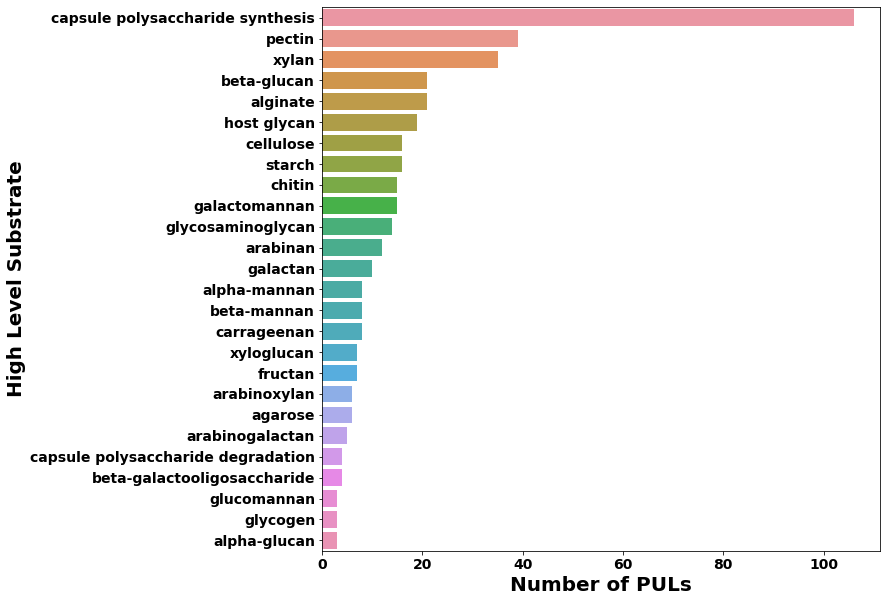

In [12]:
# some parameters for improved plotting aesthetics
# mpl.rcParams['xtick.labelsize'] = 15 
plt.rcParams["font.weight"] = "bold"

plt.figure(figsize = (10,10))
ax = sns.barplot(y="High Level Substrate", x="Number of PULs", data=count_df)
# put the labels but rotate them
plt.yticks(range(len(D)), list(D.keys()), weight = "bold", fontsize=14)
# increase the ticks on y
plt.xticks(fontsize=14)
# give labels to x
plt.xlabel("Number of PULs", weight = "bold", fontsize = 20)
# give labels to y
plt.ylabel("High Level Substrate", weight = "bold", fontsize = 20)
# put the title
# plt.title("Frequencies for the High Level Substrates", weight = "bold", fontsize = 20)
plt.savefig('cgc_frequencies.png', 
           bbox_inches='tight', facecolor ="w")
plt.show()

In [13]:
unfiltered_data = pd.read_excel("D:\subFinder\Data\Supervised_Sequences\dbCAN-PUL_07-01-2022.xlsx")

In [14]:
unfiltered_data = unfiltered_data[["ID", "organism_name"]]

In [15]:
unfiltered_data["Genera"] = pd.DataFrame(unfiltered_data["organism_name"].str.split(" ").tolist())[0]

In [16]:
# merge to bring in the genera information
data = data.merge(unfiltered_data[["ID","Genera"]], how = "left", left_on = "PUL_ID",right_on = "ID")

In [17]:
count_df_Genera = pd.DataFrame(data.Genera.value_counts()).reset_index()

count_df_Genera.columns = ["Genera", "Number of PULs"]

# count_df_Genera.head(20)

In [18]:
threshold = 3

In [19]:
count_df_Genera = count_df_Genera[count_df_Genera["Number of PULs"] >= threshold]

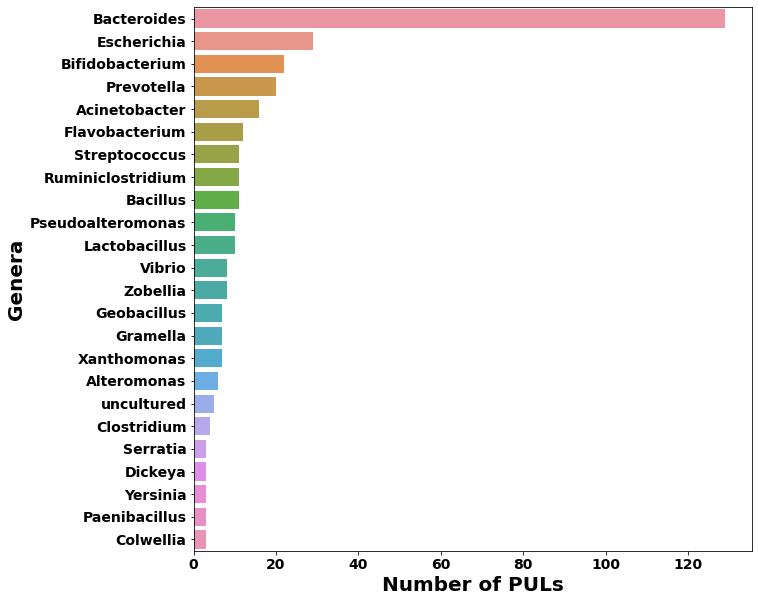

In [20]:
plt.figure(figsize = (10,10))
ax = sns.barplot(y="Genera", x="Number of PULs", data=count_df_Genera)
# put the labels but rotate them
plt.yticks(range(len(count_df_Genera)), list(count_df_Genera["Genera"]), weight = "bold", fontsize=14)
# increase the ticks on y
plt.xticks(fontsize=14)
# give labels to x
plt.xlabel("Number of PULs", weight = "bold", fontsize = 20)
# give labels to y
plt.ylabel("Genera", weight = "bold", fontsize = 20)
# put the title
# plt.title("Frequencies for the Genera", weight = "bold", fontsize = 20)
plt.savefig('genera_frequencies.png', 
           bbox_inches='tight', facecolor ="w")
plt.show()

In [21]:
temp2 = data.copy()

In [22]:
temp2["sig_gene_seq"] = [seq.replace("|", ",").replace(",", " ") for seq in temp2["sig_gene_seq"] ]

In [23]:
outer_catch = []
for seq in temp2["sig_gene_seq"]:
    inner_catch = []
    for gene in seq.split(" "):
        items = gene.split("_")
        if len(items) == 2: 
            if items[1].isdigit():
                inner_catch.append(items[0])
            else: 
                inner_catch.append(gene)      
        else: 
            inner_catch.append(gene)
    outer_catch.append(" ".join(inner_catch))
    

In [24]:
temp2["sig_gene_seq"] = outer_catch

In [25]:
all_genes = [gene for seq in temp2["sig_gene_seq"].values for gene in seq.split(" ")]

In [26]:
all_genes = [item for item in all_genes]

In [27]:
## some investigation on the genes let's do
counter_dict = Counter(all_genes)

In [28]:
# sort in descending order
counter_dict =dict(sorted(counter_dict.items(), key=lambda item: item[1], reverse = True))

In [29]:
# manipulate for plotting
first2pairs = {k: counter_dict[k] for k in list(counter_dict)}

In [30]:
gene_count_df = pd.DataFrame(first2pairs, index = [0]).T.reset_index()

In [31]:
gene_count_df.columns = ["Gene", "Frequency"]

In [32]:
sig_gene = pd.read_csv(r"D:\subFinder\Data\Supervised_Sequences\signature_gene_reference.tsv", sep = "\t", header = None)

sig_gene.columns = ["Gene_Type", "Gene"]

In [33]:
missing_mapping = {'8.A.49': "TC",
 'CBM82': "CAZyme",
 'CBM83': "CAZyme",
 'CE10': "CAZyme",
 'GH150': "CAZyme",
 'GH157': "CAZyme",
 'GH5_42': "CAZyme",
 'GH96': "CAZyme",
 'PL12_2': "CAZyme",
 'PL15_1': "CAZyme",
 'PL15_2': "CAZyme",
 'PL18': "CAZyme",
 'PRD_Mga': "CAZyme"}

missing_mapping = pd.DataFrame(missing_mapping, index = [0])

missing_mapping = missing_mapping.T.reset_index()

missing_mapping.columns = [ "Gene", "Gene_Type"]

sig_gene = pd.concat([missing_mapping, sig_gene], 0, ignore_index = True)

# sig_gene.shape

C:\Users\vedpi\AppData\Local\Temp\ipykernel_636\3882494915.py:21: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  sig_gene = pd.concat([missing_mapping, sig_gene], 0, ignore_index = True)


In [34]:
gene_count_df = gene_count_df.merge(sig_gene, how = "left", on = "Gene").sort_values(["Gene_Type", "Frequency"], ascending = [True, False])

In [35]:
gene_count_df.head()

,Gene,Frequency,Gene_Type
2,GH43,158,CAZyme
3,GT2,138,CAZyme
4,GT4,122,CAZyme
9,GH2,58,CAZyme
12,CBM6,55,CAZyme


In [36]:
temp_data = data.copy()

In [37]:
temp_data["sig_gene_seq"] = [seq.replace("|", ",").replace(",", " ") for seq in temp_data["sig_gene_seq"] ]

In [38]:
outer_catch = []
for seq in temp_data["sig_gene_seq"]:
    inner_catch = []
    for gene in seq.split(" "):
        items = gene.split("_")
        if len(items) == 2: 
            if items[1].isdigit():
                inner_catch.append(items[0])
            else: 
                inner_catch.append(gene)      
        else: 
            inner_catch.append(gene)
    outer_catch.append(" ".join(inner_catch))
    

In [39]:
temp_data["sig_gene_seq"] = outer_catch

In [40]:
def make_heatmaps(gene_type, vectorization_type, figsize = (15, 5), threshold = 25, label = 1):
    temp1 = temp_data.copy()
    # select the genes first
#     selected_genes = sig_gene[sig_gene["Gene_Type"] == gene_type]
#     vocabulary = selected_genes["Gene"].values
    vocabulary_df = gene_count_df[gene_count_df["Gene_Type"] == gene_type]
    vocabulary = vocabulary_df[vocabulary_df["Frequency"] >= threshold]["Gene"].values
    
    
    removed_catch = []
    for seq in temp1["sig_gene_seq"]: 
        removed_catch.append(" ".join([gene for gene in seq.split(" ") if gene in vocabulary]))
    
    temp1["sig_gene_seq"] = removed_catch
    
    
    current_all_genes = [gene for seq in temp1["sig_gene_seq"] for gene in seq.split(" ")]
    
    
    vocabulary = list(set(current_all_genes).intersection(vocabulary))
    
    
    # instantiate the text vectorization layer
    text_vec = tf.keras.layers.TextVectorization(standardize=None, output_mode = vectorization_type, 
                                                vocabulary =vocabulary)
    
    transformed_seqs = text_vec(temp1["sig_gene_seq"])
    transformed_gene_seqs_df = pd.DataFrame(transformed_seqs)
    transformed_gene_seqs_df = transformed_gene_seqs_df.iloc[:,1:]
    transformed_gene_seqs_df.columns = vocabulary
    transformed_gene_seqs_df["high_level_substr"] = temp_data[["high_level_substr"]].values
    heatmap = transformed_gene_seqs_df.groupby("high_level_substr").sum()
    heatmap = heatmap.reindex(sorted(heatmap.columns), axis=1)
    fig = plt.figure(figsize = figsize)
    fig = sns.heatmap(heatmap,cbar_kws={'label': 'Number of PULs'})
    cbar_axes = fig.figure.axes[-1]
    plt.xlabel(gene_type + "_" + "Genes", weight = "bold", fontsize = 20)

    plt.ylabel("High level substrates", weight = "bold", fontsize = 20)
    fig.figure.axes[-1].yaxis.label.set_size(20)
    plt.xticks(rotation = 90)
    return fig, vocabulary

In [41]:
gene_count_df[gene_count_df["Gene_Type"] == "CAZyme"].head(20)

,Gene,Frequency,Gene_Type
2,GH43,158,CAZyme
3,GT2,138,CAZyme
4,GT4,122,CAZyme
9,GH2,58,CAZyme
12,CBM6,55,CAZyme
13,GH3,52,CAZyme
14,GH16,41,CAZyme
17,GH10,37,CAZyme
20,GH5,34,CAZyme
22,PL6,33,CAZyme


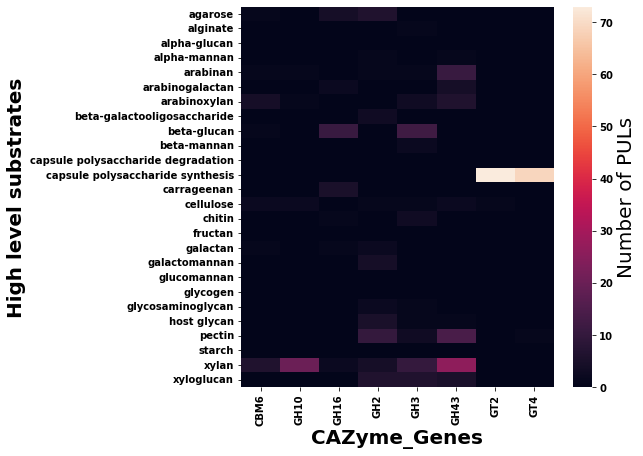

In [42]:
# plt.figure(figsize = (10, 5))
fig, vocab = make_heatmaps("CAZyme", "multi_hot", (7, 7), 35)
plt.savefig('CAZyme_heatmap.png', 
           bbox_inches='tight', facecolor ="w")
plt.show()

In [43]:
gene_count_df[gene_count_df["Gene_Type"] == "TC"].head(25)

,Gene,Frequency,Gene_Type
0,3.A.1,221,TC
1,1.B.14,205,TC
7,9.B.18,67,TC
8,8.A.46,63,TC
18,8.A.3,36,TC
19,2.A.1,35,TC
21,2.A.66,34,TC
24,2.A.2,31,TC
31,1.B.18,25,TC
45,4.A.6,18,TC


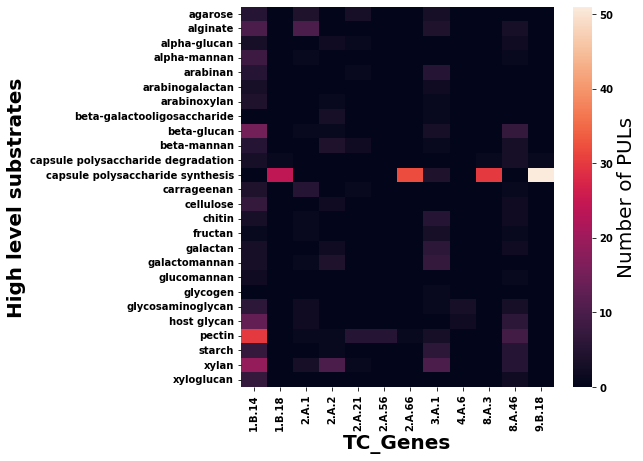

In [44]:
# plt.figure(figsize = (10, 5))
make_heatmaps("TC", "multi_hot", (7,7), 15)
plt.savefig('TC_heatmap.png', 
           bbox_inches='tight', facecolor ="w")
plt.show()

In [45]:
gene_count_df[gene_count_df["Gene_Type"] == "STP"].head(15)

,Gene,Frequency,Gene_Type
5,HTH_AraC,100,STP
10,LacI,58,STP
15,GntR,39,STP
23,PfkB,32,STP
30,SBP_bac_1,25,STP
47,Aminotran_1_2,16,STP
52,AraC_binding,14,STP
67,GerE,11,STP
77,HATPase_c,10,STP
83,NUDIX,9,STP


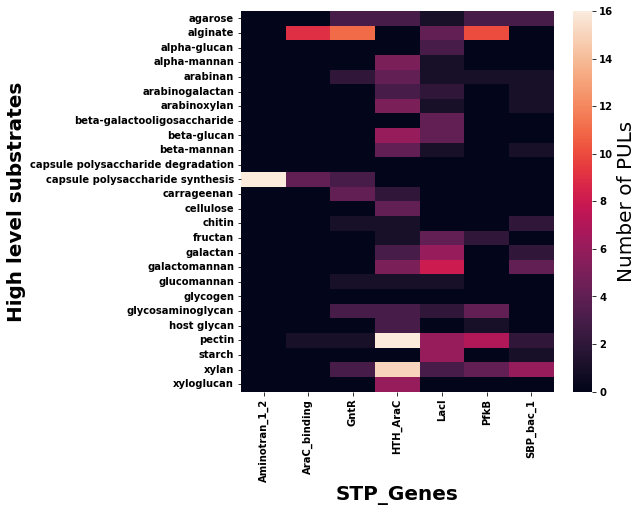

In [46]:
# plt.figure(figsize = (10, 5))
make_heatmaps("STP", "multi_hot", (7,7), 14)
plt.savefig('STP_heatmap.png', 
           bbox_inches='tight', facecolor ="w")
plt.show()

In [47]:
gene_count_df[gene_count_df["Gene_Type"] == "TF"].head(25)


,Gene,Frequency,Gene_Type
6,HTH_AraC,100,TF
11,LacI,58,TF
16,GntR,39,TF
68,GerE,11,TF
101,TrmB,6,TF
129,MarR,4,TF
183,Mga,2,TF
185,HTH_Mga,2,TF
267,Fe_dep_repress,1,TF
271,HTH_DeoR,1,TF


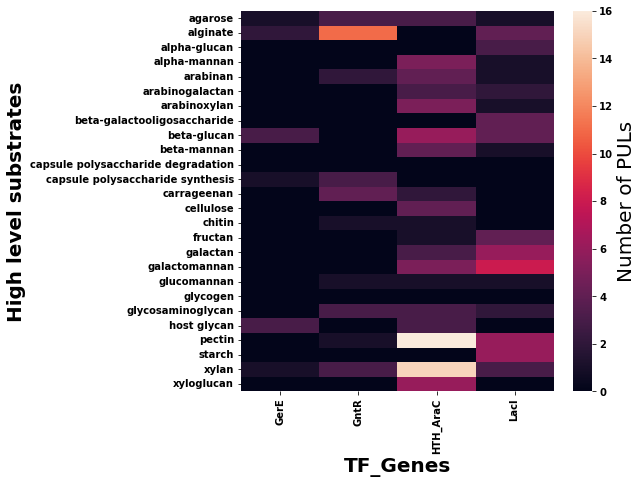

In [48]:
# plt.figure(figsize = (10, 5))
make_heatmaps("TF", "multi_hot", (7,7), 11)
plt.savefig('TF_heatmap.png', 
           bbox_inches='tight', facecolor ="w")
plt.show()

In [49]:
## One last plot comparing the number of sequences of supervised with unsupervised
data.shape

(411, 5)

In [50]:
rumen = pd.read_csv(r"D:\subFinder\Data\Output\Unsupervised_10_12\output_cowrumen.csv").drop_duplicates("sequence").shape[0]

In [51]:
earlier = pd.read_csv(r"D:\subFinder\Data\Output\Unsupervised_10_12\output_earlier.csv").drop_duplicates("sequence").shape[0]

In [52]:
oral = pd.read_csv(r"D:\subFinder\Data\Output\Unsupervised_10_12\output_humanoral.csv").drop_duplicates("sequence").shape[0]

In [53]:
marine = pd.read_csv(r"D:\subFinder\Data\Output\Unsupervised_10_12\output_marine.csv").drop_duplicates("sequence").shape[0]

In [54]:
uhgg = pd.read_csv(r"D:\subFinder\Data\Output\Unsupervised_10_12\output_UHGG.csv").drop_duplicates("sequence").shape[0]

In [55]:
unsup_samples = {"Cow Rumen": rumen, 
 "Unsupervised": earlier, 
 "Human Oral": oral, 
 "Marine": marine, 
 "UHGG": uhgg}

In [56]:
sample_counts = pd.DataFrame(unsup_samples, index = [0]).T.reset_index()

In [57]:
sample_counts = sample_counts.sort_values([0], ascending = False)

In [58]:
sample_counts.columns = ["Domain Type", "Number of PULs"]

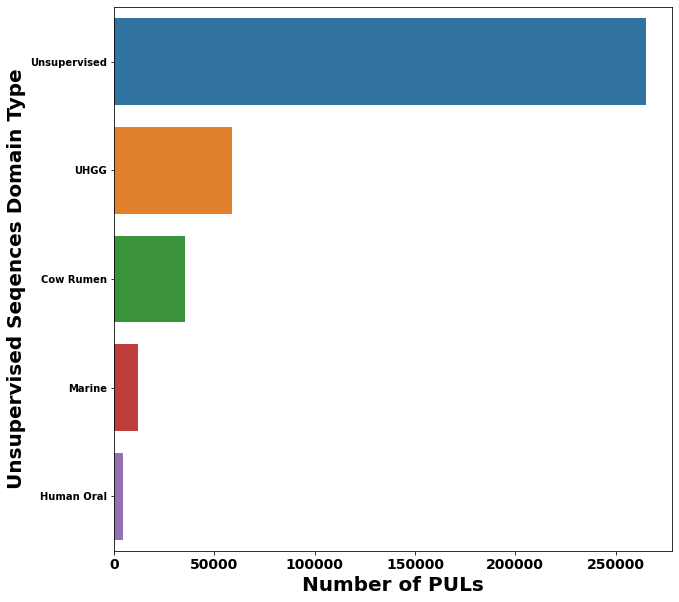

In [59]:
plt.figure(figsize = (10,10))
ax = sns.barplot(y="Domain Type", x="Number of PULs", data=sample_counts)
# put the labels but rotate them
# plt.yticks(range(len(count_df_Genera)), list(count_df_Genera["Genera"]), weight = "bold", fontsize=14)
# increase the ticks on y
plt.xticks(fontsize=14)
# give labels to x
plt.xlabel("Number of PULs", weight = "bold", fontsize = 20)
# give labels to y
plt.ylabel("Unsupervised Seqences Domain Type", weight = "bold", fontsize = 20)
# put the title
# plt.title("Number of unsupervised PULs by domain type", weight = "bold", fontsize = 20)
plt.savefig('Unsupervised_Domain_frequencies.png', 
           bbox_inches='tight', facecolor ="w")
plt.show()